# Craigslist Case Study

The goal of this exercise is to test your ability to tease out non obvious insights from data. We are loooking for candidates with sound statistics knowledge and strong analytical capabilities.

The dataset provided to you contains car sales listings and descriptions from Craglist. 
Your task is to dig into this dataset and come up with the following aggregations:
- Insightful descriptive statistics that indicate a trend in the data (you can combine
columns or use a subset of columns, entirely up to you. Try and be as creative as
possible and extract as many non-obvious metrics as you can)
- Groups for your data such that all rows in your data can be easily categorized
into groups with similar features. Make sure to list out the features for each
group.
- Optional: Develop a model that predicts the price listing of a car depending on its
features.
- HINT: Make sure you identify and remove outliers in the dataset that may indicate
data corruption or skewed results on analysis.
- HINT: Feel free to choose a subset or combination of columns for grouping the
data and in your prediction model

## Loading Data 
----------------------

I like to begin my data analysis with this process:

1. Take a look at the data with .head() to get an idea what to expect for each variable.
2. Look at the data types
3. Look at the data dimensions
4. View column names
5. Check for duplicates
6. Analyze the predict variable
7. Check for missing data

In [1]:
# Import and analyze the dataset

import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import math




vehicles = pd.read_csv('vehicles_sampled.csv')

#vehicles.head(3)

In [2]:
# Set figure size
sns.set(rc={'figure.figsize':(15,8)})

### Data Types

In [3]:
# View data types of data

vehicles.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

### Data Dimensions

In [4]:
# View shape of data

print('Number of Rows: {}'.format(vehicles.shape[0]))
print('Number of Columns: {}'.format(vehicles.shape[1]))



Number of Rows: 10795
Number of Columns: 26


### Names of Columns

In [5]:
# View variables of the data
vehicles.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'vin', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long'],
      dtype='object')

### Checking for Duplicates

In [6]:
# Look for duplicates
duplicateRowsDF = vehicles[vehicles.duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF) # No Duplicates

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Unnamed: 0, id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, vin, drive, size, type, paint_color, image_url, description, county, state, lat, long]
Index: []

[0 rows x 26 columns]


### Check Predict Variable

C:\Users\alexa\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

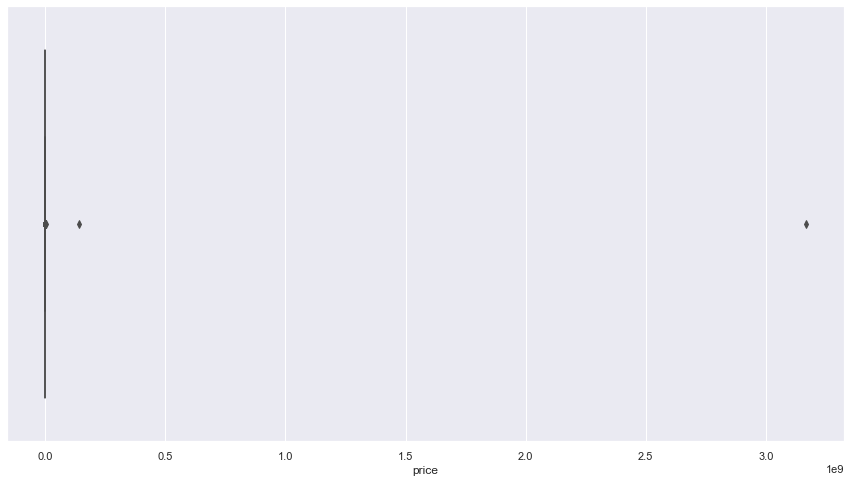

In [7]:
# Boxplot of the 'price' variable

sns.boxplot(vehicles['price'])



As we can see there are some extreme values skewing the data. We will need to remove the outliers.

In [8]:
# Look at the top and bottom 1 %
q_low = vehicles["price"].quantile(0.01)
q_hi  = vehicles["price"].quantile(0.99)


# For the top range I am going to put 50,000
# For the bottom range I am going to put 500 because I dont think there are alot of used cars selling for less
# Removing data in that range

vehicles = vehicles[(vehicles["price"] < 50000) & (vehicles["price"] > 500)]

print('Top 1%: {}'.format(q_hi))
print('Bottom 1%: {}'.format(q_low))
print('Remaining rows after removing data greater 50000 and less than 500: {}'.format(vehicles.shape[0]))

Top 1%: 51195.13999999986
Bottom 1%: 0.0
Remaining rows after removing data greater 50000 and less than 500: 9551


C:\Users\alexa\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

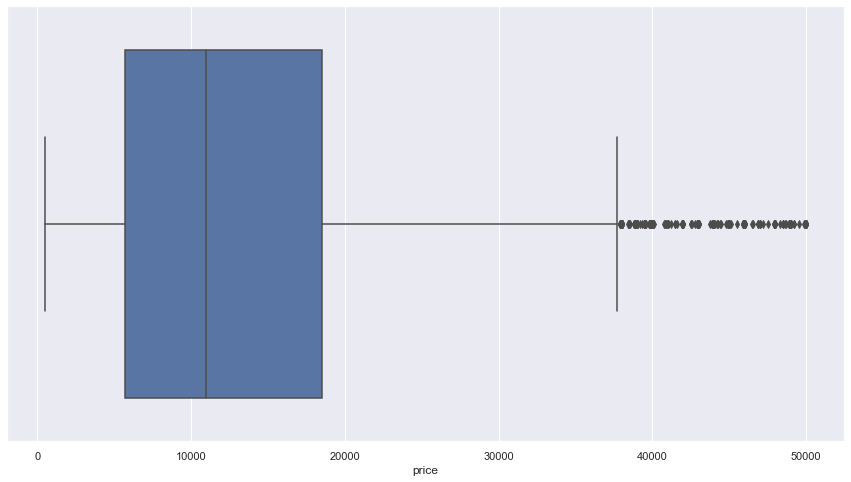

In [9]:
# Looking at the box plot after removing the outliers
sns.boxplot(vehicles['price'])


After removing the outliers the data looks much better but there are still outliers.

### Check Missing Data

In [10]:
# Take a look at the missing data for each variable by %

vehicles.isna().sum() 



Unnamed: 0         0
id                 0
url                0
region             0
region_url         0
price              0
year              19
manufacturer     332
model            137
condition       3900
cylinders       3778
fuel              65
odometer        1676
title_status      48
transmission      67
vin             4066
drive           2762
size            6559
type            2629
paint_color     2973
image_url          0
description        0
county          9551
state              0
lat               77
long              77
dtype: int64

## Data Cleaning and Addressing NAs
--------------------------

The following data was missing and this is how I addressed each variable:


**year** - 19 observations - I noticed there was a year in the 'description' variable for each of the missing data points. I imputed the missing values with the year in the description.

**manufacturer** - 332 observations - I created two dictionarys one linking model and manufacturer and the other one linking model_1word and the manufacturer. On the first attempt if the model was in the dictionary keys, the value was replaced with the dictionary value. I did the same process with the remaining missing values with model_1word. If there were any remaining missing values they were dropped. 

**model** - 137 observations - Dropped missing values

**condition** - 3900 observations - Built out a KNN model with year and odometer to predict the condition. On the testing model it scored an accuracy of 63.24%. I took this approach because I thought cars in the similar condition will have similar years and mileage. 

**cylinder** - 3778 observations - Similar to the missing values in 'manufacturer' I created two dictionaries and imputed the missing values with values from the dictionaries that were made with complete data. 

**fuel** - 65 observations - Dropped missing values.

**odometer** - 1676 observations - I imputed the missing values with the median value grouped by the year variable.

**title_status** - 48 observations - Dropped missing values.

**transmission** - 67 observations - Dropped missing values.

**vin** - 4066 observations - Dropped column.

**drive** - 2762 observations - Similar approach to manufacturer, created a dict with values from the completed data and imputed the missing values if there was a match on 'model' or 'model_1word'.

**size** - 6559 observations - Dictionary imputing method.

**type** - 2629 observations - Dictionary imputing method.

**paint_color** - 2973 observations - Replace missing values with 'Unknown'.

**county** - 9551 observations - Dropped column.

**lat** - 77 observations - Dropped missing values.

**long** - 77 observations - Dropped missing values.


#### Added a New Variable

**model_1word** - After removing the special characters from the model variable, this is the first word of the 'model' variable.


### Model

In [11]:
#Model
vehicles['model'] = vehicles['model'].astype('str')

# removed special characters from the model group
vehicles['model'] = vehicles['model'].str.replace('[^\w\s]','')

# comverting 'model' variable to lower case
vehicles['model'] = vehicles['model'].str.lower()

# removed special characters from the model group
vehicles['description'] = vehicles['description'].str.replace('[^\w\s]','')

# comverting 'model' variable to lower case
vehicles['description'] = vehicles['description'].str.lower()

# remove NaN from dataframe for 'model' variable
vehicles = vehicles.dropna(subset=['model'])

# create a variable that is the first word of the model type
vehicles['model_1word'] = vehicles['model'].str.split().str.get(0)

# see the top 20 most common first words in the 'model' variable
vehicles['model_1word'].value_counts().head(20)



f150         456
silverado    435
sierra       208
grand        201
1500         199
wrangler     193
f250         169
nan          137
civic        136
tacoma       130
accord       127
2500         126
escape       121
camry        118
f350         117
altima       112
mustang      103
explorer      97
equinox       94
focus         90
Name: model_1word, dtype: int64

### Manufacturer

In [12]:
# Missing 332 data points
# creating a dict with model and manufacturer to input missing values
manf = vehicles.dropna(subset=['model', 'manufacturer'])

manf_dict = {}
for mo, ma in manf[['model', 'manufacturer']].values:
    manf_dict[mo] = ma

# Replacing the type with the dicitonary value    
vehicles['manufacturer'] = vehicles.apply( lambda x: x['manufacturer'] if pd.notna(x['manufacturer'])
                        else manf_dict[x['model']] if x['model'] in manf_dict.keys() else x['manufacturer'], axis=1)



# creating a dict with model_1word and manufacturer to input missing values
manf2 = vehicles.dropna(subset=['model_1word', 'manufacturer'])

manf2_dict = {}
for mo, ma in manf2[['model_1word', 'manufacturer']].values:
    manf_dict[mo] = ma


# Replacing the type with the dicitonary value    
vehicles['manufacturer'] = vehicles.apply( lambda x: x['manufacturer'] if pd.notna(x['manufacturer'])
                else manf2_dict[x['model_1word']] if x['model_1word'] in manf2_dict.keys() else x['manufacturer'], axis=1)

# After running this there are 312 missing values
# I believe the manufacturer variable is important in determining the price so I will drop the missing values
vehicles = vehicles.dropna(subset=['manufacturer'])



vehicles['manufacturer'].value_counts(dropna=False).head(20) 

ford             1805
chevrolet        1408
toyota            750
nissan            534
honda             487
jeep              473
gmc               454
ram               440
dodge             338
bmw               256
hyundai           224
subaru            220
mercedes-benz     207
volkswagen        185
kia               156
chrysler          130
buick             126
cadillac          126
lexus             113
mazda             111
Name: manufacturer, dtype: int64

### Year


In [13]:
# Year
# Look at the data that is missing the 'year' variable
#vehicles[vehicles['year']!=vehicles['year']] # 19 rows

# Looks like the year is the first thing mentioned in the description
# I am going to use the year mentioned in the description
vehicles.dropna(subset=['year', 'description'], how='all', inplace=True)
vehicles['year'] = vehicles.apply(lambda x: x['description'][:5] if math.isnan(x['year']) else x['year'], axis=1)

# Convert 'year' to int64 so all datapoints have the same data type
vehicles['year'] = vehicles['year'].astype(np.int64)


### Paint

In [14]:
# Paint 
# There is 31.12% missing, we will replace these data points with 'unknown'
vehicles['paint_color'] = vehicles['paint_color'].fillna('unknown')

vehicles['paint_color'].value_counts(dropna=False)

unknown    2862
white      1587
black      1287
silver     1001
blue        655
red         650
grey        638
green       181
brown       154
custom      138
yellow       41
orange       30
purple       15
Name: paint_color, dtype: int64

### Drive

In [15]:
# Drive
# There 2762 missing, we will replace these data points with dictionary values from model 
# Creating a dictionary with the model and drive to replace some NaN values
df_d = vehicles[vehicles['drive'].notna()]
df_d1 = df_d[df_d['model'].notna()]

drive_dict = {}
for m, d in df_d1[['model', 'drive']].values:
    drive_dict[m] = d

# Replacing the type with the dicitonary value    
vehicles['drive'] = vehicles.apply( lambda x: x['drive'] if pd.notna(x['drive'])
                                     else drive_dict[x['model']] if x['model'] in drive_dict.keys() else x['drive'], axis=1)



# Create another dictionary with model_1word with is a more vague description of model to see if we can reduce the NaNs
df_dr = vehicles.dropna(subset=['model_1word', 'drive'])

drive_dict2 = {}
for m, d in df_dr[['model_1word', 'drive']].values:
    drive_dict2[m] = d
    
# Replacing the type with the dicitonary value    
vehicles['drive'] = vehicles.apply( lambda x: x['drive'] if pd.notna(x['drive'])
                                     else drive_dict2[x['model_1word']] if 
                                   x['model_1word'] in drive_dict2.keys() else x['drive'], axis=1)


# After replacing the NaN with dictionary values, there are still 140 missing data points
# I am going to drop the remaining NaN

vehicles = vehicles.dropna(subset=['drive'])



vehicles['drive'].value_counts(dropna=False)

4wd    4209
fwd    3257
rwd    1633
Name: drive, dtype: int64

### Odometer

In [16]:
# Odometer 
# Replace with median of the year 
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles.groupby('year')['odometer'].transform('median'))

# Remove remaining NaN from dataset
vehicles = vehicles.dropna(subset=['odometer'])



### Type

In [17]:
# Type
# Creating a dictionary with the model and type to replace some NaN values
df = vehicles[vehicles['type'].notna()]
df1 = df[df['model'].notna()]

type_dict = {}
for m, t in df1[['model', 'type']].values:
    type_dict[m] = t

# Replacing the type with the dicitonary value    
vehicles['type'] = vehicles.apply( lambda x: x['type'] if pd.notna(x['type'])
                                     else type_dict[x['model']] if x['model'] in type_dict.keys() else x['type'], axis=1)


# Create another dictionary with model_1word with is a more vague description of model to see if we can reduce the NaNs
df_tr = vehicles.dropna(subset=['model_1word', 'type'])

type_dict2 = {}
for m, t in df_tr[['model_1word', 'type']].values:
    type_dict2[m] = t
    
# Replacing the type with the dicitonary value    
vehicles['type'] = vehicles.apply( lambda x: x['type'] if pd.notna(x['type'])
                                     else type_dict2[x['model_1word']] if 
                                   x['model_1word'] in type_dict2.keys() else x['type'], axis=1)

# After replacing the NaN with dictionary values, there are still 46 missing data points
# I am going to drop the remaining NaN

vehicles = vehicles.dropna(subset=['type'])


vehicles['type'].value_counts(dropna=False)

sedan          2255
SUV            2212
pickup         1404
truck          1177
coupe           436
hatchback       322
other           304
wagon           285
van             236
convertible     191
mini-van        165
offroad          27
bus              10
Name: type, dtype: int64

### Cylinders

In [18]:
# Cylinders --> 3778 missing data point
# Creating a dictionary with the model and type to replace some NaN values
df_c = vehicles[vehicles['cylinders'].notna()]
df_c1 = df_c[df_c['model'].notna()]

cyl_dict = {}
for m, c in df_c1[['model', 'cylinders']].values:
    cyl_dict[m] = c

# Replacing the type with the dicitonary value    
vehicles['cylinders'] = vehicles.apply( lambda x: x['cylinders'] if pd.notna(x['cylinders'])
                                     else cyl_dict[x['model']] if x['model'] in cyl_dict.keys() else x['cylinders'], axis=1)

# After replacing the NaN with dictionary values, there are still 979 missing data points
vehicles['cylinders'].value_counts(dropna=False)

6 cylinders     2906
8 cylinders     2510
4 cylinders     2475
NaN              979
10 cylinders      76
5 cylinders       62
other             10
3 cylinders        5
12 cylinders       1
Name: cylinders, dtype: int64

In [19]:
# Creating a defaultdict with two keys to see if we can key 'manufacturer' & 'type' to a certain cylinder


df_a = vehicles[vehicles['cylinders'].notna()]
df_a1 = df_a[df_a['manufacturer'].notna()]
df_a2 = df_a1[df_a1['type'].notna()]

d = defaultdict(dict)
for m,t,c in df_a2[['manufacturer', 'type', 'cylinders']].values:
    d[m][t] = c

vehicles['cylinders'] = vehicles.apply(lambda x: x['cylinders'] if pd.notna(x['cylinders'])
                                          else d[x['manufacturer']][x['type']] if (x['manufacturer'] in d) &
                                       (x['type'] in d[x['manufacturer']]) else x['cylinders'], axis=1)

# After running this we brought our missing values from 979 to 14. 
# I am going to drop the remaining NaN

vehicles = vehicles.dropna(subset=['cylinders'])


vehicles['cylinders'].value_counts(dropna=False)

6 cylinders     3229
4 cylinders     2837
8 cylinders     2769
10 cylinders      94
5 cylinders       64
other             10
3 cylinders        6
12 cylinders       1
Name: cylinders, dtype: int64

### Size

In [20]:
# Size
# There were 6151 datapoints missing from the 'size' variable

# Going to create a dictionary with 2 keys (manufacturer, type) and link it it size

size = vehicles.dropna(subset=['manufacturer', 'type', 'size'])

s = defaultdict(dict)
for m, t, z in size[['manufacturer', 'type', 'size']].values:
    s[m][t] = z
    
vehicles['size'] = vehicles.apply(lambda x: x['size'] if pd.notna(x['size'])
                                          else s[x['manufacturer']][x['type']] if (x['manufacturer'] in s) & 
                                  (x['type'] in s[x['manufacturer']]) else x['size'], axis=1)

# After mapping out the size to the manufacturer/type we are still missing 164 datapoints, I plan on dropping the NaNs
vehicles = vehicles.dropna(subset=['size'])



vehicles['size'].value_counts(dropna=False)

full-size      4878
mid-size       2624
compact        1184
sub-compact     160
Name: size, dtype: int64

### Fuel, title_status, transmission, lat, long

In [21]:
# Take a look at the number of missing datapoints for the following variables

vehicles[['fuel', 'title_status', 'transmission', 'lat', 'long']].isna().sum()


fuel            59
title_status    41
transmission    61
lat             68
long            68
dtype: int64

In [22]:
# Since the missing values are <1%, we are going to drop these rows

vehicles = vehicles.dropna(subset=['fuel', 'title_status', 'transmission', 'lat', 'long'])


### Dropping Columns


In [23]:
vehicles = vehicles.drop(columns=['url', 'region_url', 'county', 'image_url', 'vin', 'Unnamed: 0', 'description'])

### Condition

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC


cond = vehicles[vehicles['condition']==vehicles['condition']]
m_cond = vehicles[vehicles['condition'].isna()]

print(cond.shape, m_cond.shape)

(5205, 20) (3426, 20)


In [25]:
# creating training set and set for missing values, going to train the model with 'year' and 'odometer' and predict the missing
# values with the model
y_train = cond['condition']
x_train = cond[['year', 'odometer']].values
x_rest = m_cond[['year', 'odometer']].values



# KNN model requires you to specify n_neighbors,


# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(x_train, y_train)


KNN_prediction = KNN_model.predict(x_train)

# The model isnt great but it will work.
print(accuracy_score(KNN_prediction, y_train))


0.6324687800192123


In [26]:
# append dataset with predicted values for condition to dataset that has 'condition' values
m_cond.loc[:,'condition'] = KNN_model.predict(x_rest)

df = cond.append(m_cond)[cond.columns.tolist()]


## Exploratory Data Analysis
-------------------------


In [27]:
df.shape

(8631, 20)

### Numerical Variables


In [28]:
# Take a look at the statistical values for the numeric variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8631.0,7.087616e+09,5.183931e+06,7.074434e+09,7.084245e+09,7.088941e+09,7.092057e+09,7.093534e+09
price,8631.0,1.329555e+04,9.676091e+03,5.290000e+02,5.600000e+03,1.099000e+04,1.850000e+04,4.999900e+04
year,8631.0,2.010007e+03,7.294600e+00,1.935000e+03,2.007000e+03,2.011000e+03,2.015000e+03,2.020000e+03
odometer,8631.0,1.053257e+05,7.423168e+04,0.000000e+00,5.900350e+04,1.019700e+05,1.443305e+05,3.000051e+06
lat,8631.0,3.849752e+01,5.933374e+00,-5.660200e+01,3.444805e+01,3.928450e+01,4.250480e+01,6.482280e+01
long,8631.0,-9.401118e+01,1.759069e+01,-1.600590e+02,-1.065125e+02,-8.810590e+01,-8.128640e+01,-2.077890e+01


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

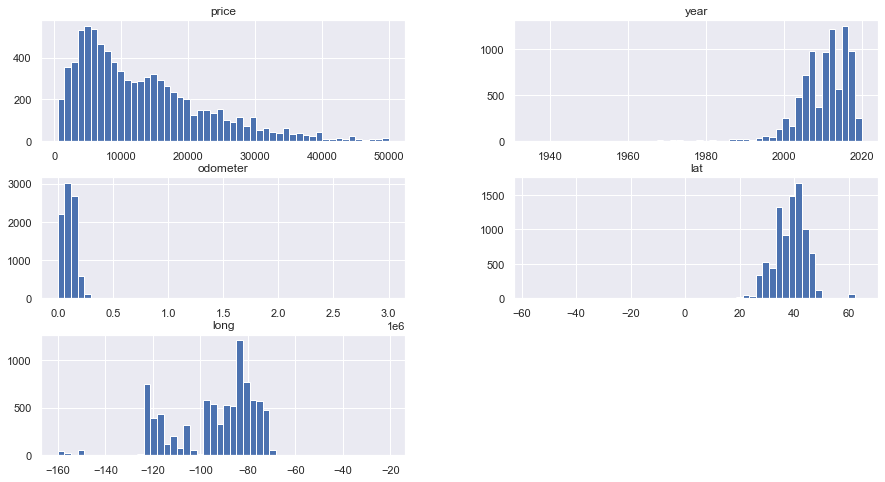

In [29]:
# create numeric df
numeric = df[['price', 'year', 'odometer', 'lat', 'long']]


# show distribution of all numeric values
numeric.hist(bins=50)

#### Lat vs Long Plot

Text(0.5, 1.0, 'Longitude vs Latitude')

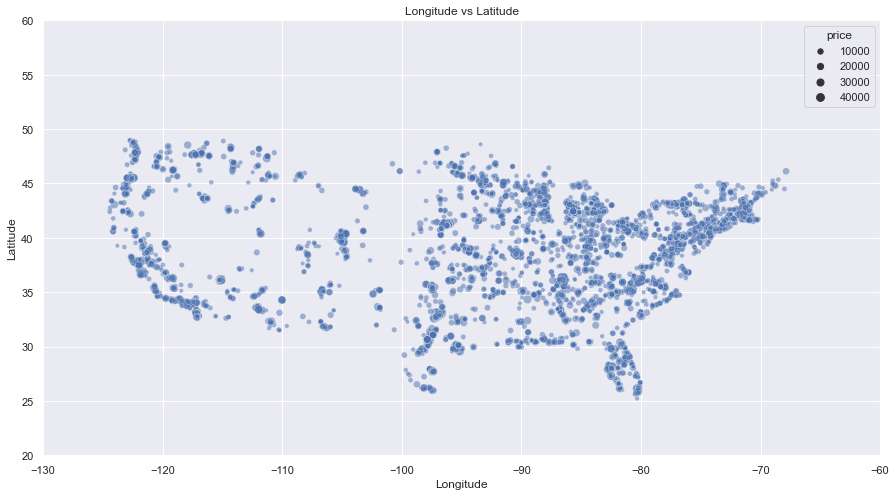

In [32]:
fig, ax = plt.subplots()
sns.scatterplot(x='long', y='lat', data=df, alpha=0.5, size='price')
ax.set_xlim(-130,-60)
ax.set_ylim(20, 60)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude')

In this plot we plotted the 'long' data points on the x-axis and the 'lat' data points on the y-axis. The scatter plot produces an image that resembles the United States. From this plot you can see that most of the data points are from the east coast and eastern mid-west region. There is some activity in the west coast, and not many data points in the rest of mid-west and south west regions.

#### Year vs Price Plot


Text(0.5, 1.0, 'Year vs Price')

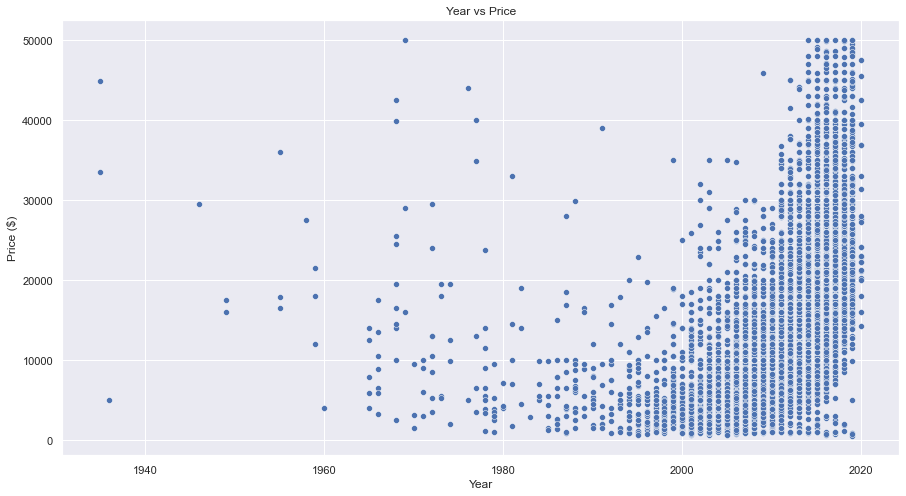

In [33]:
fig, ax = plt.subplots()
sns.scatterplot(x='year', y='price', data=df)
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Year vs Price')

This is a scatter plot with 'year' on the x-axis and 'price' on the y-axis. As you can see there isn't a strong correlation. There is alot of noise going on in the 2015-2020 year range.

#### Odometer vs Price Plot

Text(0.5, 1.0, 'Miles Drive vs Price')

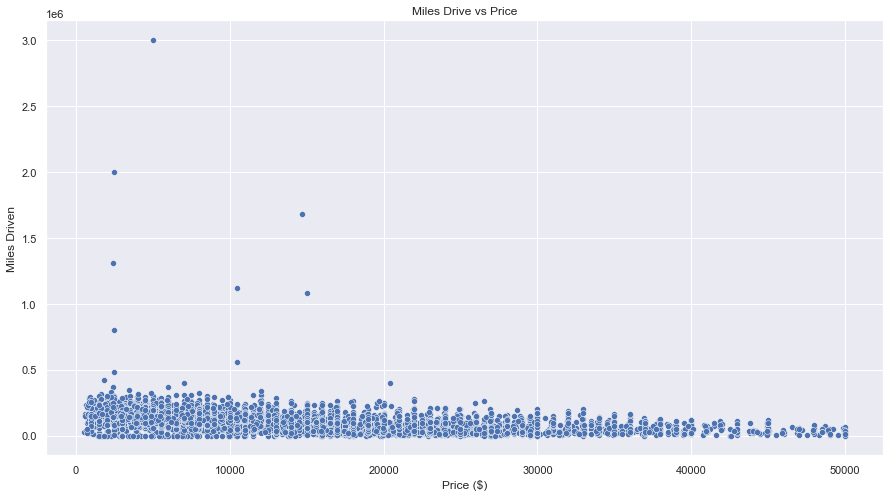

In [35]:
fig, ax = plt.subplots()
sns.scatterplot(x='price', y='odometer', data=df)
plt.xlabel('Price ($)')
plt.ylabel('Miles Driven')
plt.title('Miles Drive vs Price')

This is a scatter plot with the 'price' on the x-axis and 'odometer' on the y-axis. There are a few outliers (odometer > 50000) that are skewing this plot. Without those outliers the plot would look like this. (See below)

Text(0.5, 1.0, 'Miles Driven vs Price')

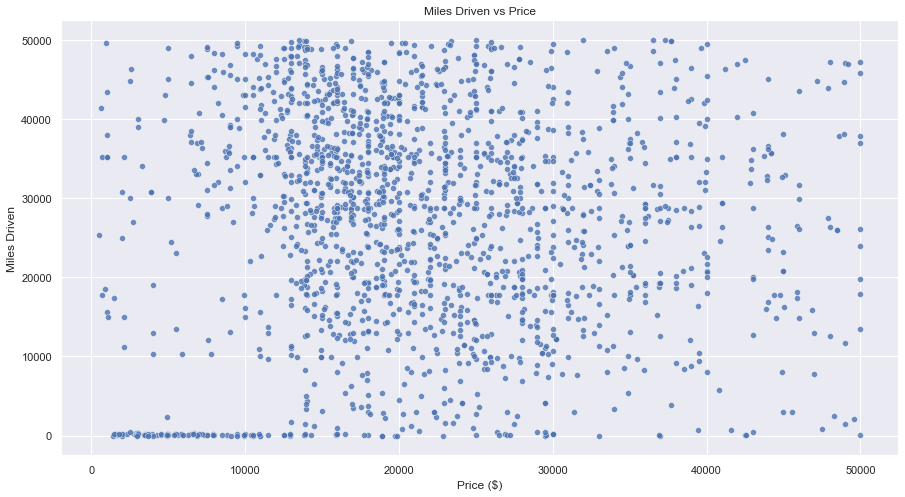

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(x='price', y='odometer', data=df[df['odometer'] < 50000], alpha=0.8)
plt.xlabel('Price ($)')
plt.ylabel('Miles Driven')
plt.title('Miles Driven vs Price')

### Categorical Variables

In [38]:
# Take a look at the number of unique variables for each non-numeric value
cat = df.select_dtypes(exclude=['int64', 'float64'])

cat.apply(lambda x: x.unique().shape[0])

region           380
manufacturer      37
model           2563
condition          6
cylinders          8
fuel               5
title_status       6
transmission       3
drive              3
size               4
type              13
paint_color       13
state             51
model_1word      547
dtype: int64

#### Manufacturer vs Price Boxplot

Text(0.5, 1.0, 'Manufacturer vs Price')

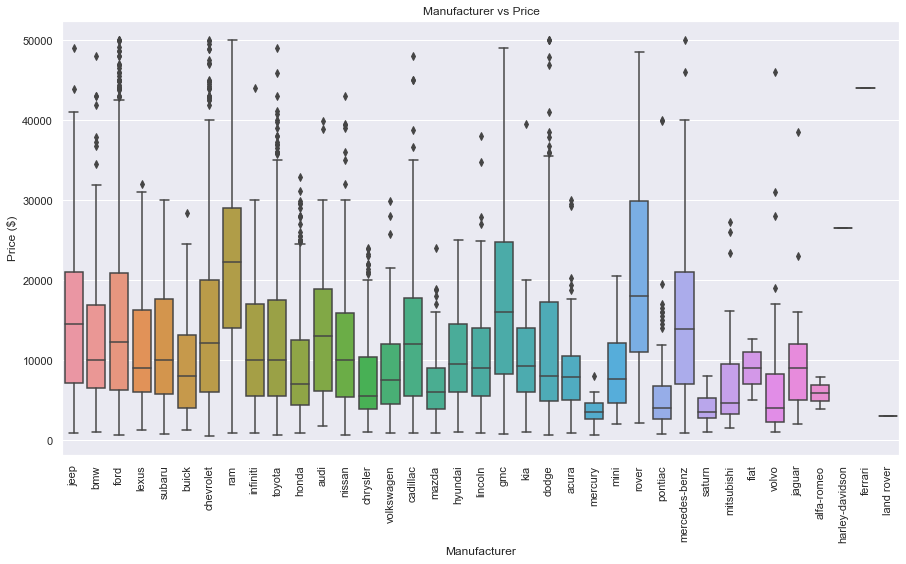

In [40]:
# Manufacturer vs Price

sns.boxplot(x=df['manufacturer'], y=df['price'])
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Price ($)')
plt.title('Manufacturer vs Price')

#### Cylinder vs Price Boxplot

Text(0.5, 1.0, 'Cylinders vs Price')

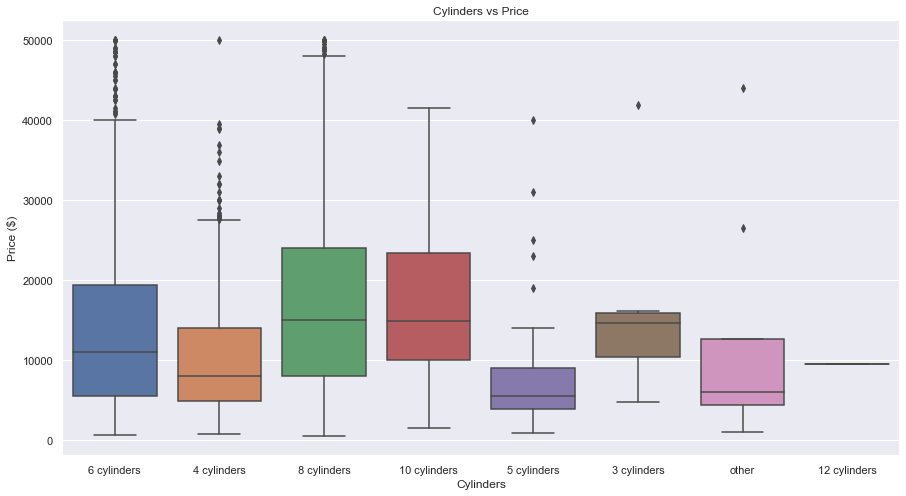

In [48]:
sns.boxplot(x=df['cylinders'], y=df['price'])
plt.xlabel('Cylinders')
plt.ylabel('Price ($)')
plt.title('Cylinders vs Price')


#### Condition vs Price Boxplot

Text(0.5, 1.0, 'Condition vs Price')

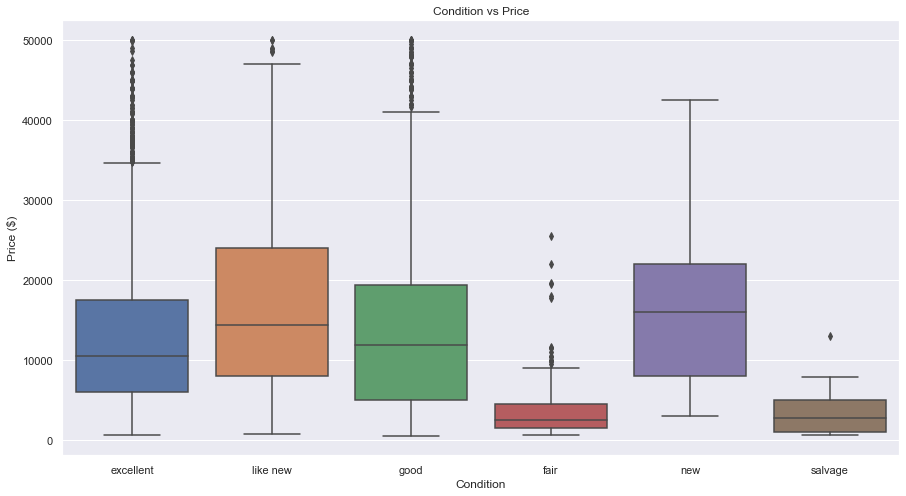

In [49]:
sns.boxplot(x=df['condition'], y=df['price'])
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.title('Condition vs Price')


#### Title Status vs Price Boxplot

Text(0.5, 1.0, 'Title Status vs Price')

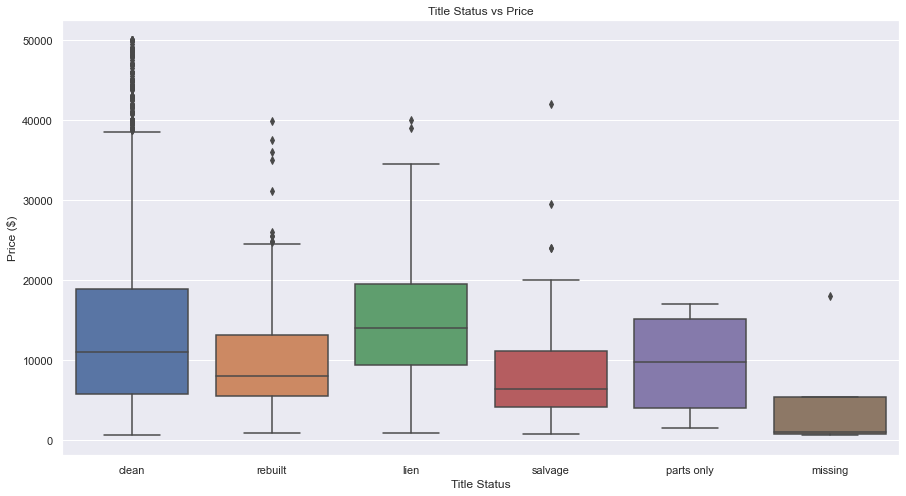

In [50]:
sns.boxplot(x=df['title_status'],y=df['price'])
plt.xlabel('Title Status')
plt.ylabel('Price ($)')
plt.title('Title Status vs Price')

#### Type vs Price Boxplot

Text(0.5, 1.0, 'Vehicle Type vs Price')

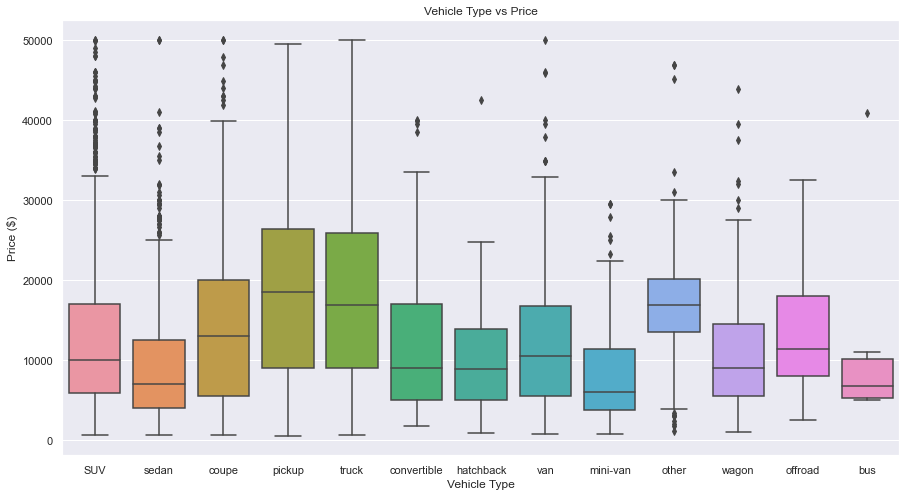

In [51]:
sns.boxplot(x=df['type'], y=df['price'])
plt.xlabel('Vehicle Type')
plt.ylabel('Price ($)')
plt.title('Vehicle Type vs Price')


#### Size vs Price Boxplot

Text(0.5, 1.0, 'Vehicle Size vs Price')

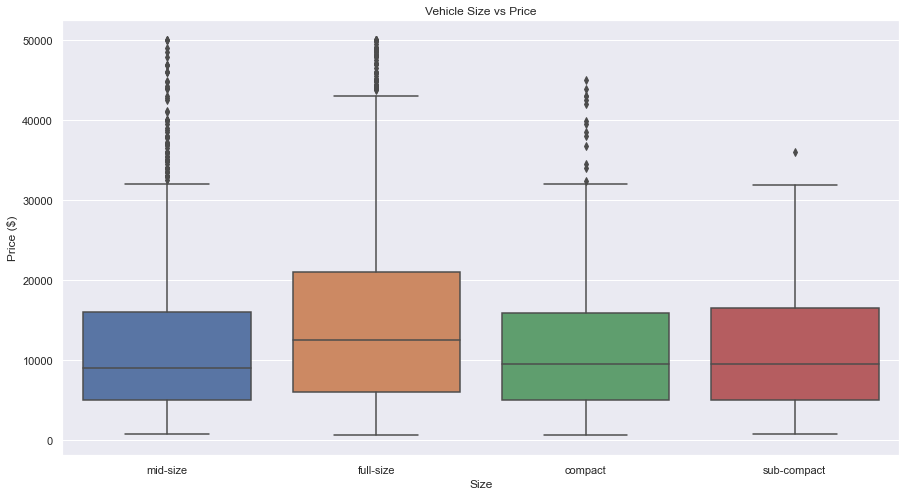

In [52]:
sns.boxplot(x=df['size'], y=df['price'])
plt.xlabel('Size')
plt.ylabel('Price ($)')
plt.title('Vehicle Size vs Price')


#### State vs Price Boxplot

Text(0.5, 1.0, 'State vs Price')

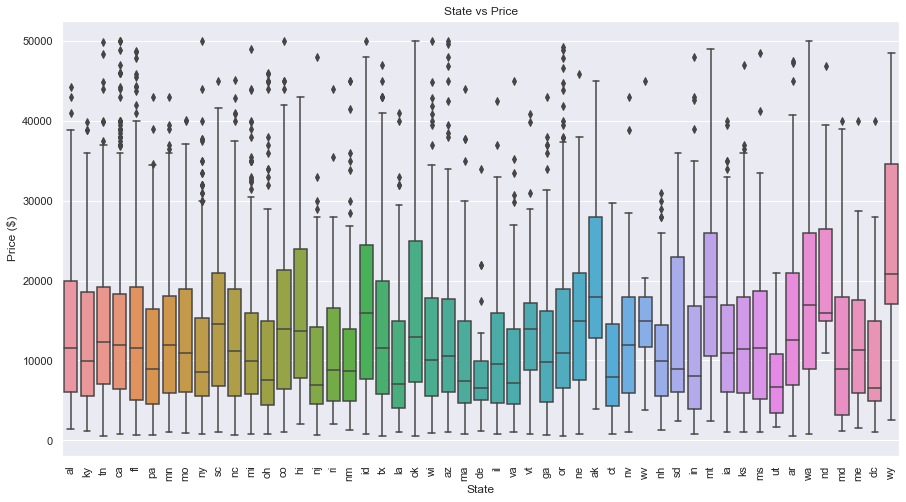

In [54]:
sns.boxplot(x=df['state'], y=df['price'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Price ($)')
plt.title('State vs Price')

## Model Development

### Feature Engineering

- Removing outliers observed in visualizations
- Creating dummy variables for categorical variables I want in my model

In [55]:
# Outliers - create a function that removes outliers from a dataset that are more than 1.5 * IQR from the 25% and 75% 

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


# removing outliers for price, odometer, lat, long, year

rows_before = df.shape[0]

df = remove_outlier(df, 'price')
df = remove_outlier(df, 'odometer')
df = remove_outlier(df, 'lat')
df = remove_outlier(df, 'long')
final = remove_outlier(df, 'year')

rows_after = final.shape[0]

print('Rows before removing the outliers: {}'.format(rows_before))
print('Rows after removing the outliers: {}'.format(rows_after))
print(final.columns)


# Columns for model: 
# price, year, manufacturer, condition, cylinders, fuel, odometer, title_status, transmisison, type, lat, long

df_final = pd.get_dummies(final, columns=['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 
                                          'transmission', 'type', 'drive'])
df_final = df_final.drop(columns=['id', 'region', 'model', 'size', 'paint_color', 'state', 'model_1word'])


Rows before removing the outliers: 8631
Rows after removing the outliers: 7986
Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'model_1word'],
      dtype='object')


In [56]:
df_final.head()

,price,year,odometer,lat,long,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,drive_4wd,drive_fwd,drive_rwd
0,13950,2011,90461.0,30.6869,-88.2162,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8490,2009,99680.0,38.0970,-85.3645,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9,4500,2012,140000.0,35.6960,-86.3680,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11,8999,2009,126225.0,36.5626,-82.4612,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,6500,2013,129000.0,33.7439,-116.3590,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [57]:
# Separate data between train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_final, test_size=0.3)

train_x = train.drop(columns=['price']).values
train_y = train['price']

test_x = test.drop(columns=['price']).values
test_y = test['price']



In [58]:
# Create model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



model = LinearRegression().fit(train_x, train_y)



co_det = model.score(train_x, train_y)
score_test = model.score(test_x, test_y)
score_train = model.score(train_x, train_y)


print("Coefficients: \n", model.coef_) 
print('\n')
print("Intercept: \n", model.intercept_) 
print('\n')
print('Coefficient of Determination for Model / Score of Training Set: {:.3f}'.format(co_det))
print('Score of Testing Set: {:.3f}'.format(score_test))


Coefficients: 
 [ 8.42629611e+02 -4.68925647e-02  2.40752945e+01 -4.35363109e+01
  3.94727768e+02  1.50407658e+03 -1.69272329e+02 -5.52702694e+02
 -2.93954951e+01 -7.68909407e+02 -2.15479542e+03 -1.95013115e+03
 -4.78259397e+03 -1.46429792e+03  6.40030388e+02  5.15185147e+03
  1.60979836e+03 -1.97010999e+03 -4.32390821e+02 -6.35062740e+02
  1.10366691e+03 -2.25395076e+03  9.03810360e-12  2.58624717e+03
  3.45631131e+02 -1.19990827e+02  1.77036887e+03 -1.36265273e+03
 -6.32717051e+02 -1.69238567e+02 -1.55101369e+03 -1.01776044e+03
  7.24872580e+02  4.81930192e+03 -2.44903888e+02  7.72194218e+02
  1.99328909e+03 -2.29025980e+03  1.13609324e+03  9.88104133e+01
 -2.33399528e+02  2.94374961e+02 -3.98128698e+02  8.40529981e+02
 -6.02187130e+02  5.97301968e+03 -5.46331262e+03 -1.65347084e+03
 -1.31969871e+03  1.36912346e+03  3.12212342e+03 -2.02778439e+03
  5.77576478e+03 -2.87853944e+03 -1.77084773e+03 -1.03106864e+03
 -9.53089736e+01  1.56821578e+03  2.70689868e+03 -2.59766777e+02
  1.25288